<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/main/basics/challenges/Data_Visualization_Challenge_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Challenge - Seaborn and Matplotlib
In the previous notebook, you learned about various visualization techniques using Seaborn and Matplotlib. You got familiar with line plots, scatter plots, bar plots, histograms, box plots, swarm plots, and heatmaps.

Now it's your turn to demonstrate your skills with this challenge! You'll be applying your knowledge of the different plots and trying to derive insights from the datasets provided.

Let's get started!

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Datasets

In [ ]:
students_url = 'https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/students.csv'
athletes_url = 'https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/student_athletes.csv'
academics_url = 'https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/student_academics.csv'

students = pd.read_csv(students_url, index_col='id')
athletes = pd.read_csv(athletes_url, index_col=0)
academics = pd.read_csv(academics_url, index_col=0)

In [ ]:
students

,name,age,grade,gender
id,,,,
0,Thomas Conrad,15,9,Male
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female
3,Sandra Sexton,17,11,Female
4,Michelle Davis,16,10,Female
...,...,...,...,...
4995,Deborah Mercado,17,12,Female
4996,Angela Moon,16,10,Female
4997,Stephanie Holmes,18,12,Female


In [ ]:
athletes

,id,age,sport,years experience,hours training,ranking
0,0,15,Track and Field,4,13.30,0.76
1,1,15,Swimming,2,13.90,0.53
2,1,15,Soccer,1,13.70,0.28
3,1,15,Track and Field,4,8.30,0.58
4,2,15,Track and Field,1,7.70,0.02
...,...,...,...,...,...,...
13251,4995,16,Soccer,2,13.74,0.51
13252,4995,17,Soccer,3,19.10,0.84
13253,4996,15,Basketball,1,9.70,0.07
13254,4996,16,Basketball,2,10.78,0.41


In [ ]:
academics

,id,name,grade level,course,course score
0,0,Thomas Conrad,9,Algebra 1,70
1,0,Thomas Conrad,9,Biology,87
2,0,Thomas Conrad,9,World Geography,74
3,0,Thomas Conrad,9,English 1,77
4,0,Thomas Conrad,9,Physical Education,88
...,...,...,...,...,...
62130,4999,Linda Middleton,10,Algebra 2,94
62131,4999,Linda Middleton,10,Chemistry,100
62132,4999,Linda Middleton,10,World History,70
62133,4999,Linda Middleton,10,English 2,90


# Line Plot

A line plot visualizes the relationship between two sets of values. By connecting data points with a line, we can see trends over time or other relationships.

Now, try to make a line plot showing the relationship between an athletes years of experience and their rank. Don't forget to add a title and labels for the axes!

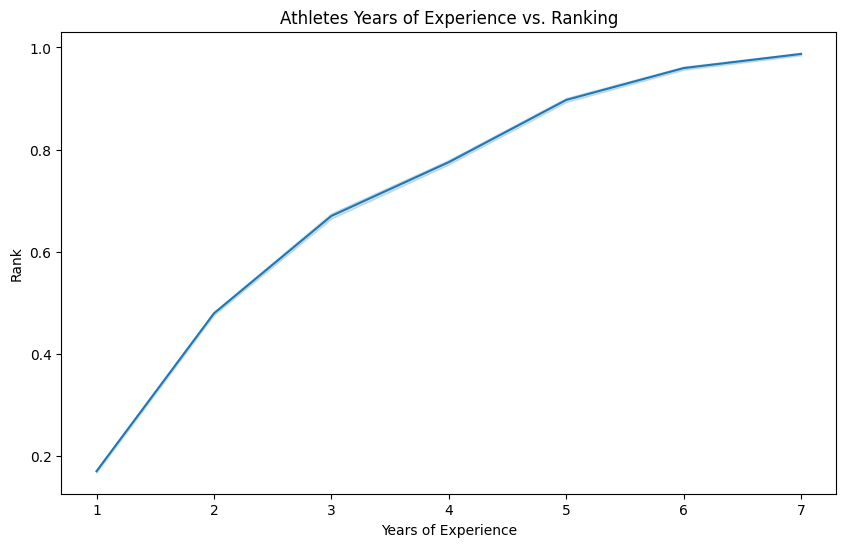

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=athletes, x='years experience', y='ranking')

plt.title('Athletes Years of Experience vs. Ranking')
plt.xlabel('Years of Experience')
plt.ylabel('Rank')
plt.show()

How strong does the relationship between years of experience and rank appear?
- Extremely strong!

# Scatter Plot

In a scatter plot, we plot individual data points on an X-Y plane. This type of plot is great for spotting correlations between two variables.

Create a scatter plot showing the relationship between an athlete's hours training and their ranking. Also, color code the points by `'years experience'` to see if different sports show different patterns.

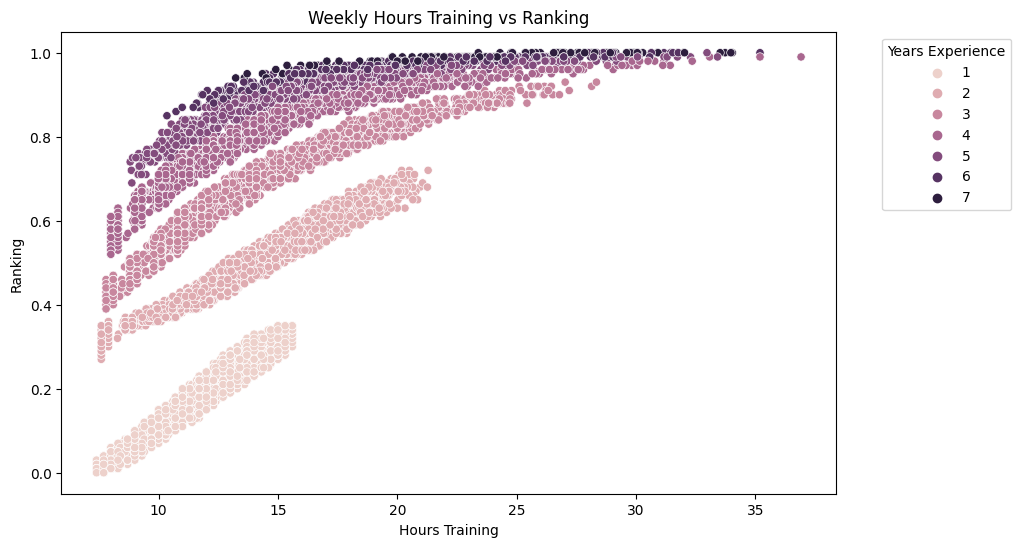

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=athletes, x='hours training', y='ranking', hue='years experience')

plt.title('Weekly Hours Training vs Ranking')
plt.xlabel('Hours Training')
plt.ylabel('Ranking')
plt.legend(title='Years Experience', bbox_to_anchor=(1.05, 1), loc=2) # Formats the legend to be on the right side
plt.show()

The output might look a bit confusing, but you can see that there are at least 4 distinct groups. These are caused by an underlying relationship with `'years experience'`.

What does the relationship between hours training and ranking look like for those with only 1 year of experience?
- Positive Linear

Generally, what relationship does hours training have with ranking?
- Positive

# Bar Plot

Bar plots are used for comparing the quantities of different categories or groups.

For this task, create a bar plot showing the average athletic ranking by age.

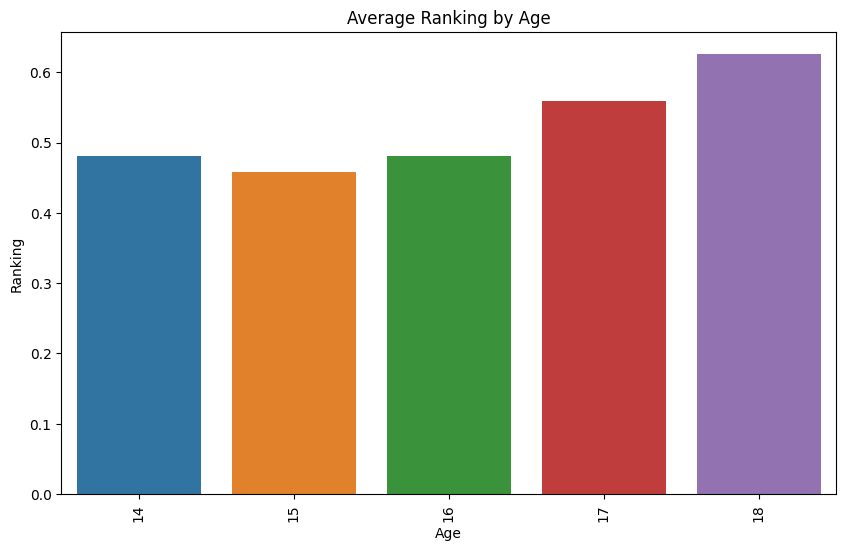

In [ ]:
avg_scores_by_grade = athletes.groupby('age')['ranking'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores_by_grade.index, y=avg_scores_by_grade.values)

plt.title('Average Ranking by Age')
plt.xlabel('Age')
plt.ylabel('Ranking')
plt.xticks(rotation=90)
plt.show()

Does there appear to be a relationship between age and ranking?

Why might the ranking be higher for 14 year olds than 15 year olds?

# Box Plot

Box plots provide a good visual summary of the data points and help to identify outliers.

Create a box plot showing the average hours spent training based on age.

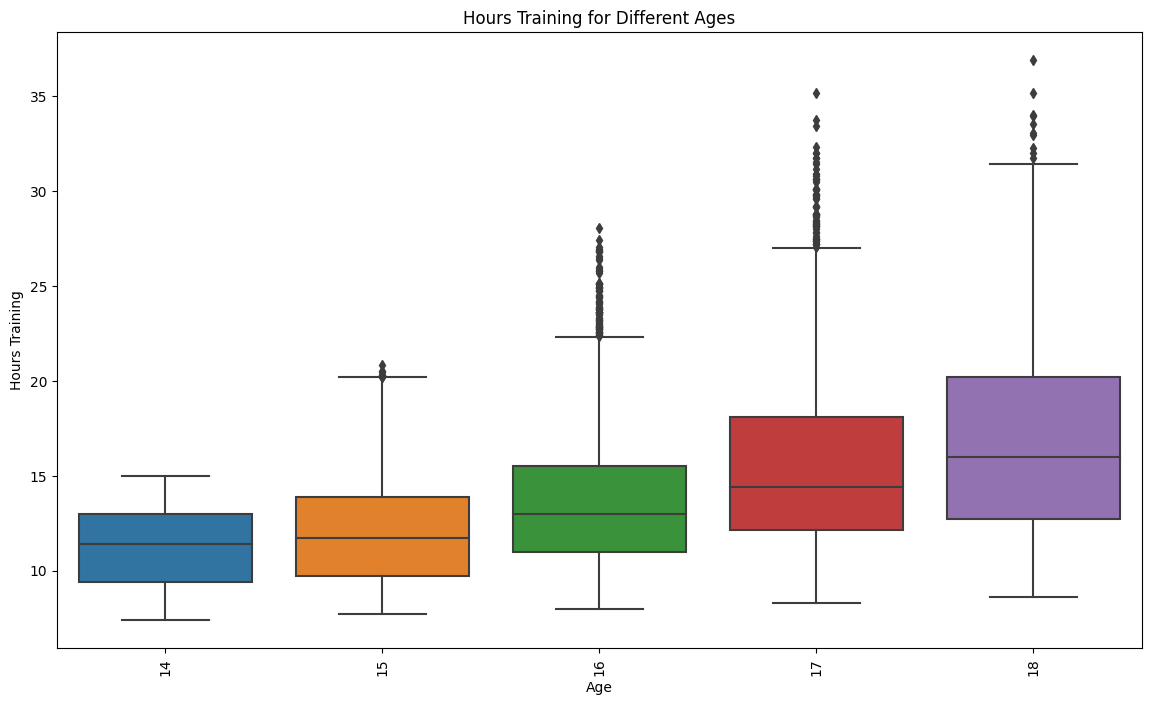

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=athletes, x='age', y='hours training')
plt.title('Hours Training for Different Ages')
plt.xlabel('Age')
plt.ylabel('Hours Training')
plt.xticks(rotation=90)
plt.show()

Generally, do older athletes train longer?

Which age has the largest range of values?

# Histogram

Histograms are used to visualize the distribution of a set of continuous data.

Try making a histogram showing the distribution of hours spent training. Also, plot a Kernel Density Estimate (KDE) on top of the histogram.

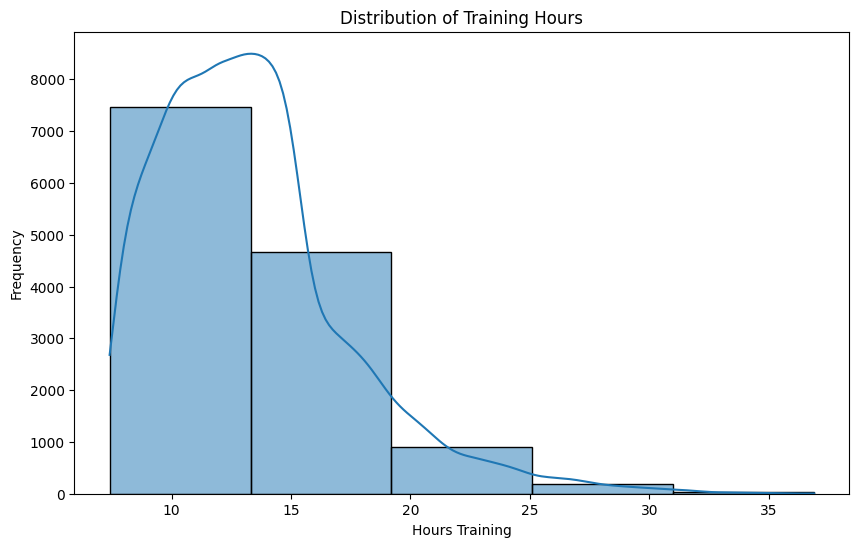

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(athletes['hours training'], bins=5, kde=True)

plt.title('Distribution of Training Hours')
plt.xlabel('Hours Training')
plt.ylabel('Frequency')
plt.show()

Why might there be fewer students training around 35 hours a week than 10?
- It gets increasingly more difficult to train more hours, until you physically don't have enough time.

# Swarm Plot

Swarm plots provide a good visual summary of the data points without any overlap.

Create a swarm plot displaying the course scores by sport. Sample only 100 examples.

Text(0.5, 1.0, 'Swarm plot of ranking by years experience')

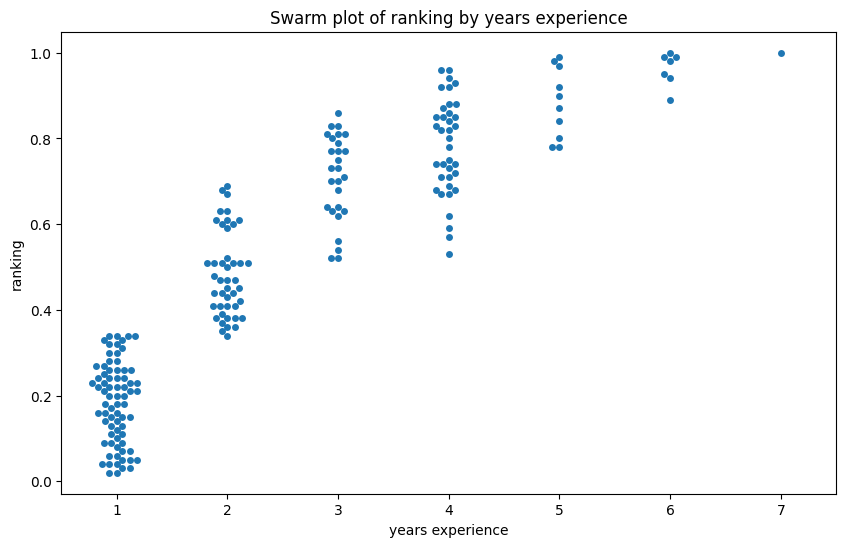

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="years experience", y="ranking", data=athletes.sample(200))
plt.title("Swarm plot of ranking by years experience")

Are there more students with 1 year of experience or 7? Which has more students with a high ranking?



# Heatmap

Heatmaps are used to depict the correlation between different numeric features in a dataset.

For this task, create a heatmap showing the correlations between the different subjects in the academics dataset. This is taken care of for you, just use `academics_pivot`.

In [ ]:
course_to_subject = {
    'Algebra 1': 'Math',
    'Algebra 2': 'Math',
    'Geometry': 'Math',
    'Precalculus': 'Math',
    'Calculus': 'Math',
    'Biology': 'Science',
    'Chemistry': 'Science',
    'Physics': 'Science',
    'Environmental Science': 'Science',
    'Astronomy': 'Science',
    'Anatomy': 'Science',
    'World Geography': 'History',
    'World History': 'History',
    'American History': 'History',
    'American Government': 'History',
    'Economics': 'History',
    'English 1': 'English',
    'English 2': 'English',
    'English 3': 'English',
    'English 4': 'English',
    'Physical Education': 'Elective',
    'Computer Science': 'Elective',
    'Cooking': 'Elective',
    'Yearbook': 'Elective',
    'Studio Art': 'Elective',
    'Music': 'Elective'
}
academics['subject'] = academics['course'].map(course_to_subject)
academics_pivot = academics.pivot_table(values='course score', index='id', columns='subject')
academics_pivot

subject,Elective,English,History,Math,Science
id,,,,,
0,88.000000,77.000000,74.000000,70.000000,87.000000
1,84.000000,75.000000,72.000000,94.000000,74.000000
2,93.500000,99.000000,87.500000,70.500000,78.000000
3,76.666667,76.333333,92.333333,90.333333,85.666667
4,81.500000,85.500000,71.000000,98.500000,79.000000
...,...,...,...,...,...
4995,78.250000,78.250000,81.000000,93.000000,94.000000
4996,96.000000,78.500000,94.500000,71.500000,88.500000
4997,86.000000,79.250000,84.250000,73.250000,91.250000


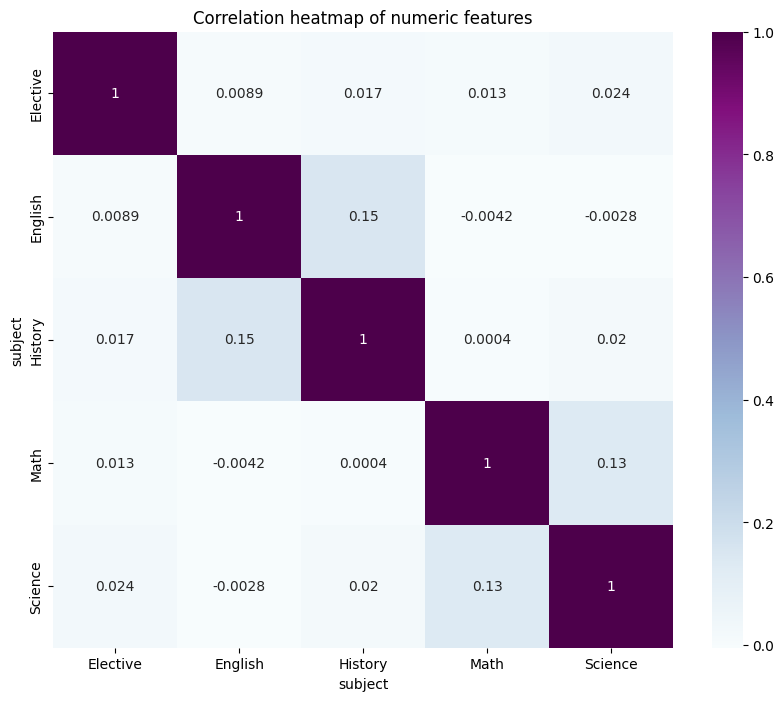

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(academics_pivot.corr(), annot=True, cmap='BuPu') # try some values for cmap ('BuPu', 'Blues, 'coolwarm', 'Greens')
plt.title('Correlation heatmap of numeric features')
plt.show()

Does there appear to be a correlation between math and science? Math and english?
- Yes and no, respectively.